In [5]:
import sympy as sp
def getMetric(lineElement, coordSystem="Cartesian", subs=None, overrideConst = False): #the override lets the code run faster if you know for sure your line element will work out
    if coordSystem not in ["Cartesian", "PlanePolar", "SphericalPolar", "CylindricalPolar"]:
        raise ValueError("Unknown coordinate system")

    lineElement=sp.expand(lineElement)
    coords = (t, x, y, z)

    dim = len(coords)
    g = sp.zeros(dim)

    for mu in range(dim):
        for nu in range(dim):
            coeff = lineElement.coeff(sp.diff(coords[mu]) * sp.diff(coords[nu]))
            if mu != nu and coeff != 0:
                g[mu, nu] = coeff.subs(subs) / 2
            else:
                g[mu, nu] = coeff.subs(subs)
                
    # Check for unexpected terms in the line element
    if not overrideConst:
        reconstructed_line_element = sum(g[i, j] * sp.diff(coords[i]) * sp.diff(coords[j]) for i in range(dim) for j in range(dim))
        if sp.simplify(lineElement.subs(subs) - reconstructed_line_element) != 0:
            raise ValueError("Line element contains terms that are not pure differentials of the coordinates used")
    return g

In [6]:
vs, sigma, R, lam = sp.symbols('v_s sigma R lambda')
t = sp.Function('t')(lam)
x = sp.Function('x')(lam)
y = sp.Function('y')(lam)
z = sp.Function('z')(lam)

dt=sp.diff(t)
dx=sp.diff(x)
dy=sp.diff(y)
dz=sp.diff(z)

# for now, define constants as symbols
rs, R = sp.symbols("r_s, R")
G, M, c = sp.symbols("G M c")

lineElement = (1-rs/4/R)**2/(1+rs/4/R)**2 *dt**2 -(1+rs/4/R)**4 *(dx**2+dy**2+dz**2)
display(lineElement)

# order of substitutions matter!!!
subs= [
    (R, sp.sqrt(x**2+y**2+z**2)),
    (rs, 2*G*M/(c**2))
]

metric=getMetric(lineElement, "Cartesian", subs, True)
metric

(1 - r_s/(4*R))**2*Derivative(t(lambda), lambda)**2/(1 + r_s/(4*R))**2 - (1 + r_s/(4*R))**4*(Derivative(x(lambda), lambda)**2 + Derivative(y(lambda), lambda)**2 + Derivative(z(lambda), lambda)**2)

Matrix([
[4*G**2*M**2/(c**4*(4*G**2*M**2/c**4 + 16*G*M*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)/c**2 + 16*x(lambda)**2 + 16*y(lambda)**2 + 16*z(lambda)**2)) - 2*G*M/(c**2*(G**2*M**2/(2*c**4*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 2*G*M/c**2 + 2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + 1/(G**2*M**2/(4*c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + G*M/(c**2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 1),                                                                                                                                                                                                                                                                                     0,                                                                                                                                                                                                                                                                             

## computation connection coeffecients (christoffel)

In [7]:
metric_inv = metric.inv()
print("matrix inverted")

# defining a partial
def partial_derivative(matrix, var):
    """ This function returns the matrix of partial derivatives """
    print(f"starting partial matrix: {matrix} var: {var}")
    return sp.Matrix(matrix.shape[0], matrix.shape[1], lambda i,j: sp.diff(matrix[i, j], var))

# for future modularity
simple = False

# derivatives of metric tensor
partial_t = partial_derivative(metric, t)
partial_x = partial_derivative(metric, x)
partial_y = partial_derivative(metric, y)
partial_z = partial_derivative(metric, z)

print("start computation")
# computing the symbols using the metric equation
christoffel_symbols = [[[0 for i in range(4)] for j in range(4)] for k in range(4)]
for lambda_ in range(4):
    for mu in range(4):
        for nu in range(4):
            a = 1/2 * (
                metric_inv[lambda_, 0] * (partial_x[mu, nu] + partial_x[nu, mu] - partial_t[mu, nu]) +
                metric_inv[lambda_, 1] * (partial_t[mu, nu] + partial_t[nu, mu] - partial_x[mu, nu]) +
                metric_inv[lambda_, 2] * (partial_y[mu, nu] + partial_y[nu, mu] - partial_y[mu, nu]) +
                metric_inv[lambda_, 3] * (partial_z[mu, nu] + partial_z[nu, mu] - partial_z[mu, nu])
            )
            christoffel_symbols[lambda_][mu][nu]= a.simplify() if simple else a
            print(f"l: {lambda_} mu: {mu} nu{nu}")
            print(christoffel_symbols[lambda_][mu][nu])
            

matrix inverted
starting partial matrix: Matrix([[4*G**2*M**2/(c**4*(4*G**2*M**2/c**4 + 16*G*M*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)/c**2 + 16*x(lambda)**2 + 16*y(lambda)**2 + 16*z(lambda)**2)) - 2*G*M/(c**2*(G**2*M**2/(2*c**4*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 2*G*M/c**2 + 2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + 1/(G**2*M**2/(4*c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + G*M/(c**2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 1), 0, 0, 0], [0, -G**4*M**4/(16*c**8*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**2) - G**3*M**3/(2*c**6*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**(3/2)) - 3*G**2*M**2/(2*c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) - 2*G*M/(c**2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) - 1, 0, 0], [0, 0, -G**4*M**4/(16*c**8*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**2) - G**3*M**3/(2*c**6*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**(3/2)) - 3*G**2*M**2/(2*c**4*(x(lambda)**2 + y(lambda)**2 + z(lam

0.5*(-G**4*M**4*x(lambda)/(4*c**8*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**3) - 3*G**3*M**3*x(lambda)/(2*c**6*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**(5/2)) - 3*G**2*M**2*x(lambda)/(c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**2) - 2*G*M*x(lambda)/(c**2*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**(3/2)))*(-16*c**8*x(lambda)**4 - 32*c**8*x(lambda)**2*y(lambda)**2 - 32*c**8*x(lambda)**2*z(lambda)**2 - 16*c**8*y(lambda)**4 - 32*c**8*y(lambda)**2*z(lambda)**2 - 16*c**8*z(lambda)**4)/(G**4*M**4 + 8*G**3*M**3*c**2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2) + 24*G**2*M**2*c**4*x(lambda)**2 + 24*G**2*M**2*c**4*y(lambda)**2 + 24*G**2*M**2*c**4*z(lambda)**2 + 32*G*M*c**6*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)*x(lambda)**2 + 32*G*M*c**6*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)*y(lambda)**2 + 32*G*M*c**6*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)*z(lambda)**2 + 16*c**8*x(lambda)**4 + 32*c**8*x(lambda)**2*y(lambda)**2 + 32*c**8*x(lambda)**2*z(lambda)

In [9]:
C = christoffel_symbols

Definitions of momenta using trajectory of photon:

$$
\frac{dt}{d\lambda}-p^t=0
$$
$$
\frac{dx}{d\lambda}-p^x=0
$$
$$
\frac{dy}{d\lambda}-p^y=0
$$

In [11]:
pt = sp.diff(t, lam)
px = sp.diff(x, lam)
py = sp.diff(y, lam)
pz = sp.diff(y, lam)

## THE FOLLOWING STILL NEEDS TO BE EDITED FOR MODULARITY
$$
\frac{dp^t}{d\lambda}+\Gamma^t_{tt}(p^t)^2+\Gamma^t_{xx}(p^x)^2+2\Gamma^t_{tx}p^tp^x+2\Gamma^t_{ty}p^tp^y+2\Gamma^t_{xy}p^xp^y=0
$$
$$
\frac{dp^x}{d\lambda}+\Gamma^x_{tt}(p^t)^2+\Gamma^x_{xx}(p^x)^2+2\Gamma^x_{tx}p^tp^x+2\Gamma^x_{ty}p^tp^y+2\Gamma^x_{xy}p^xp^y=0
$$
$$
\frac{dp^y}{d\lambda}+\Gamma^y_{tt}(p^t)^2+2\Gamma^y_{tx}p^tp^x=0
$$

### Model assumes symmetry
[0, 1, 2, 3]=[t,x,y,z]

In [13]:
Ct, Cx, Cy, Cz = C[0], C[1], C[2], C[3]
dptdl = -1 * (Ct[0][0] * pt**2 + Ct[1][1] * px**2 + Ct[2][2] * py**2 + Ct[3][3] * pz**2 + 2 * (Ct[0][1] * pt * px + Ct[0][2] * pt * py + Ct[0][3] * pt * pz + Ct[1][2] * px * py + Ct[1][3] * px * pz + Ct[2][3] * py * pz))
dpxdl = -1 * (Cx[0][0] * pt**2 + Cx[1][1] * px**2 + Cx[2][2] * py**2 + Cx[3][3] * pz**2 + 2 * (Cx[0][1] * pt * px + Cx[0][2] * pt * py + Cx[0][3] * pt * pz + Cx[1][2] * px * py + Cx[1][3] * px * pz + Cx[2][3] * py * pz))
dpydl = -1 * (Cy[0][0] * pt**2 + Cy[1][1] * px**2 + Cy[2][2] * py**2 + Cy[3][3] * pz**2 + 2 * (Cy[0][1] * pt * px + Cy[0][2] * pt * py + Cy[0][3] * pt * pz + Cy[1][2] * px * py + Cy[1][3] * px * pz + Cy[2][3] * py * pz))
dpzdl = -1 * (Cz[0][0] * pt**2 + Cz[1][1] * px**2 + Cz[2][2] * py**2 + Cz[3][3] * pz**2 + 2 * (Cz[0][1] * pt * px + Cz[0][2] * pt * py + Cz[0][3] * pt * pz + Cz[1][2] * px * py + Cz[1][3] * px * pz + Cz[2][3] * py * pz))

# dptdl = dptdl.simplify()
# dpxdl = dpxdl.simplify()
# dpydl = dpydl.simplify()
# dpzdl = dpzdl.simplify()

In [33]:
dpzdl

-0.5*(4*G**2*M**2*(-16*G*M*z(lambda)/(c**2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) - 32*z(lambda))/(c**4*(4*G**2*M**2/c**4 + 16*G*M*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)/c**2 + 16*x(lambda)**2 + 16*y(lambda)**2 + 16*z(lambda)**2)**2) - 2*G*M*(G**2*M**2*z(lambda)/(2*c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**(3/2)) - 2*z(lambda)/sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2))/(c**2*(G**2*M**2/(2*c**4*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 2*G*M/c**2 + 2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2))**2) + (G**2*M**2*z(lambda)/(2*c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**2) + G*M*z(lambda)/(c**2*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)**(3/2)))/(G**2*M**2/(4*c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + G*M/(c**2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 1)**2)*(-16*c**8*x(lambda)**4 - 32*c**8*x(lambda)**2*y(lambda)**2 - 32*c**8*x(lambda)**2*z(lambda)**2 - 16*c**8*y(lambda)**4 - 32*c**8*y(lambda)**2*z(lambda)**2

## Recursive system

In [86]:
G, M, c = sp.symbols('G M c')
t = sp.Function('t')(lam)
x = sp.Function('x')(lam)
y = sp.Function('y')(lam)
z = sp.Function('z')(lam)
dt = sp.diff(t, lam)
dx = sp.diff(x, lam)
dy = sp.diff(y, lam)
dz = sp.diff(z, lam)

# define constants relative unit values
G_val = 1
M_val = 1
c_val = 1
# G_val = 6.6743*10**-11
# M_val = 3
# c_val = 299792458

# can work on some modularity w/reg substitutions
def evaluate(eq, POS, VEL):
    [t_val, x_val, y_val, z_val]=POS
    [dt_val, dx_val, dy_val, dz_val]=VEL
    substitutions = {
        t: t_val,
        x: x_val,
        y: y_val,
        z: z_val,
        dt: dt_val,
        dx: dx_val,
        dy: dy_val,
        dz: dz_val, 
        G: G_val,
        M: M_val,
        c: c_val,
    }
    
    # Perform substitutions
    result = eq.subs(substitutions)
    result = result.evalf()
    return result

In [87]:
# import numpy as np
# dLambda
dL=0.1
# angles=np.linspace(0, np.pi/3, 5)
angles = [0]
# define initial conditions

geods=[]

for theta_0 in angles:
    L=0
    pos=[0, 0, 3, 0] #[t, x, y, z]
    vel=[-1, -2, 0, 0] #[t',x',y', z']
    acc=[0, 0, 0, 0] #[t'',x'',y'', z'']

    geod = {
        L: [pos, vel, acc]
    }

    # set up recursion

    for i in range(30):
        L_=L
        L+=dL
        dp=[
            evaluate(dptdl, pos, vel),
            evaluate(dpxdl, pos, vel),
            evaluate(dpydl, pos, vel),
            evaluate(dpzdl, pos, vel)
        ]
        p=[
            geod[L_][1][0]+dp[0]*dL,
            geod[L_][1][1]+dp[1]*dL,
            geod[L_][1][2]+dp[2]*dL,
            geod[L_][1][3]+dp[3]*dL
        ]
        a=[
            geod[L_][0][0]+p[0]*dL,
            geod[L_][0][1]+p[1]*dL,
            geod[L_][0][2]+p[2]*dL,
            geod[L_][0][3]+p[3]*dL
        ]
        geod[L]=[a,p,dp]
    geods.append(geod)


In [38]:
geods

[{0: [[1, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
  0.1: [[1, 0.100000000000000, 1.01200000000000, 0],
   [0, 1, 0.120000000000000, 0],
   [0, 0, 1.20000000000000, 0]],
  0.2: [[1, 0.200000000000000, 1.03600000000000, 0],
   [0, 1, 0.240000000000000, 0],
   [0, 0, 1.20000000000000, 0]],
  0.30000000000000004: [[1, 0.300000000000000, 1.07200000000000, 0],
   [0, 1, 0.360000000000000, 0],
   [0, 0, 1.20000000000000, 0]],
  0.4: [[1, 0.400000000000000, 1.12000000000000, 0],
   [0, 1, 0.480000000000000, 0],
   [0, 0, 1.20000000000000, 0]],
  0.5: [[1, 0.500000000000000, 1.18000000000000, 0],
   [0, 1, 0.600000000000000, 0],
   [0, 0, 1.20000000000000, 0]],
  0.6: [[1, 0.600000000000000, 1.25200000000000, 0],
   [0, 1, 0.720000000000000, 0],
   [0, 0, 1.20000000000000, 0]],
  0.7: [[1, 0.700000000000000, 1.33600000000000, 0],
   [0, 1, 0.840000000000000, 0],
   [0, 0, 1.20000000000000, 0]],
  0.7999999999999999: [[1, 0.800000000000000, 1.43200000000000, 0],
   [0, 1, 0.960000000000000, 0],
 

## Plotting

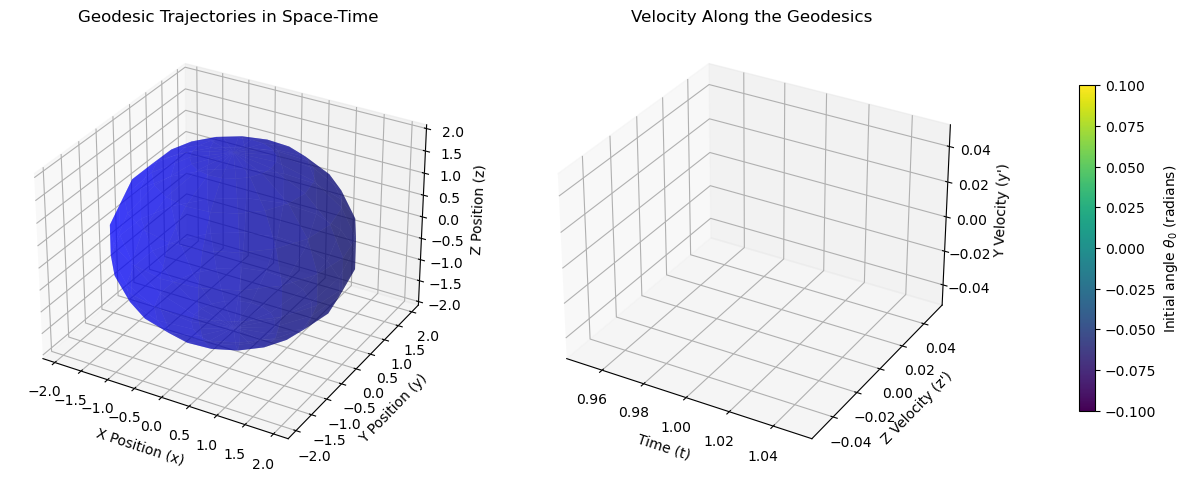

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colorbar import ColorbarBase

fig = plt.figure(figsize=(14, 7))

# Create a new subplot for position
ax = fig.add_subplot(121, projection='3d')
ax.set_xlabel('X Position (x)')
ax.set_ylabel('Y Position (y)')
ax.set_zlabel('Z Position (z)')
ax.set_title('Geodesic Trajectories in Space-Time')

# Create a new subplot for velocity
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_xlabel('Time (t)')
ax2.set_ylabel("Z Velocity (z')")
ax2.set_zlabel("Y Velocity (y')")
ax2.set_title("Velocity Along the Geodesics")

# Normalize for the color map to correspond to the range of theta_0
norm = Normalize(vmin=np.min(angles), vmax=np.max(angles))

# Generate a color map ranging from 0 to 1 over the number of geodesics
colors = cm.viridis(norm(angles))

# Plotting each geodesic with its corresponding color
for geod, color in zip(geods, colors):
    lambdas = list(geod.keys())
    positions = [geod[key][0] for key in lambdas]
    velocities = [geod[key][1] for key in lambdas]
    ts, xs, ys, zs = zip(*positions)
    tps, xps, yps, zps = zip(*velocities)

    # Position plot
    ax.plot(xs, ys, zs, color=color)

    # Velocity plot
    ax2.plot(ts, zps, yps, color=color)

# Create a sphere at the origin
r_s = 2*G_val*M_val/c_val**2  # Set the radius of the sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = r_s*np.cos(u)*np.sin(v)
y = r_s*np.sin(u)*np.sin(v)
z = r_s*np.cos(v)

# Plot sphere in both subplots
ax.plot_surface(x, y, z, color='b', alpha=0.5)

# Create a colorbar as a legend
sm = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])  # Dummy array for the colorbar

# Add colorbar to the figure
cbar = fig.colorbar(sm, ax=[ax, ax2], orientation='vertical', fraction=0.015, pad=0.1)
cbar.set_label('Initial angle $\\theta_0$ (radians)')

plt.show()

In [88]:
import plotly.graph_objects as go
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

# Assume `trimmed_geods`, `angles` and `rs` (radius of the sphere) are defined
rs = 2*G_val*M_val/c_val**2
print(rs)

# More refined grid for smoother sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
x = rs * np.sin(phi) * np.cos(theta)
y = rs * np.sin(phi) * np.sin(theta)
z = rs * np.cos(phi)

# Define the figure
fig = go.Figure()

# Normalize and prepare colors for geodesics
norm = Normalize(vmin=np.min(angles), vmax=np.max(angles))
colors = cm.viridis(norm(angles))
hex_colors = [f'rgb({int(c[0]*255)}, {int(c[1]*255)}, {int(c[2]*255)})' for c in colors]

# Plotting each geodesic with its corresponding color
for geod, color in zip(geods, hex_colors):
    lambdas = list(geod.keys())
    positions = [geod[key][0] for key in lambdas]
    ts, xs, ys, zs = zip(*positions)

    # Convert all NumPy floats to Python floats
    xs = [float(x) for x in xs]
    ys = [float(y) for y in ys]
    zs = [float(z) for z in zs]

    # Position plot
    fig.add_trace(go.Scatter3d(x=xs, y=ys, z=zs, mode='lines', line=dict(color=color), name='Position'))

# Create a surface trace for the sphere with a refined grid
fig.add_trace(go.Surface(x=x, y=y, z=z, showscale=False, opacity=0.5, colorscale=[[0, 'lightblue'], [1, 'lightblue']]))
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers',
    marker=dict(size=5, color='red'),  # Adjust size and color as needed
    name='Origin'
))
fig.add_trace(go.Scatter3d(
    x=[xs[0]], y=[ys[0]], z=[zs[0]],
    mode='markers',
    marker=dict(size=5, color='green'),  # Adjust size and color as needed
    name='Start'
))
c=max(abs((min(min(xs, ys, zs)))), max(max(xs, ys, zs)), rs)
c+=2
fig.update_layout(
    width=800,
    height=800,
    scene=dict(
        xaxis_title='X (x)',
        yaxis_title='Y (y)',
        zaxis_title='Z (z)',
        aspectmode='cube',  # Ensure equal scaling
        
        xaxis=dict(range=[-c, c]), # Set axis limits to match sphere radius
        yaxis=dict(range=[-c, c]),
        zaxis=dict(range=[-c, c])
    ),
    title='Geodesic Trajectories and Spherical Object'
)

fig.show()


2.0


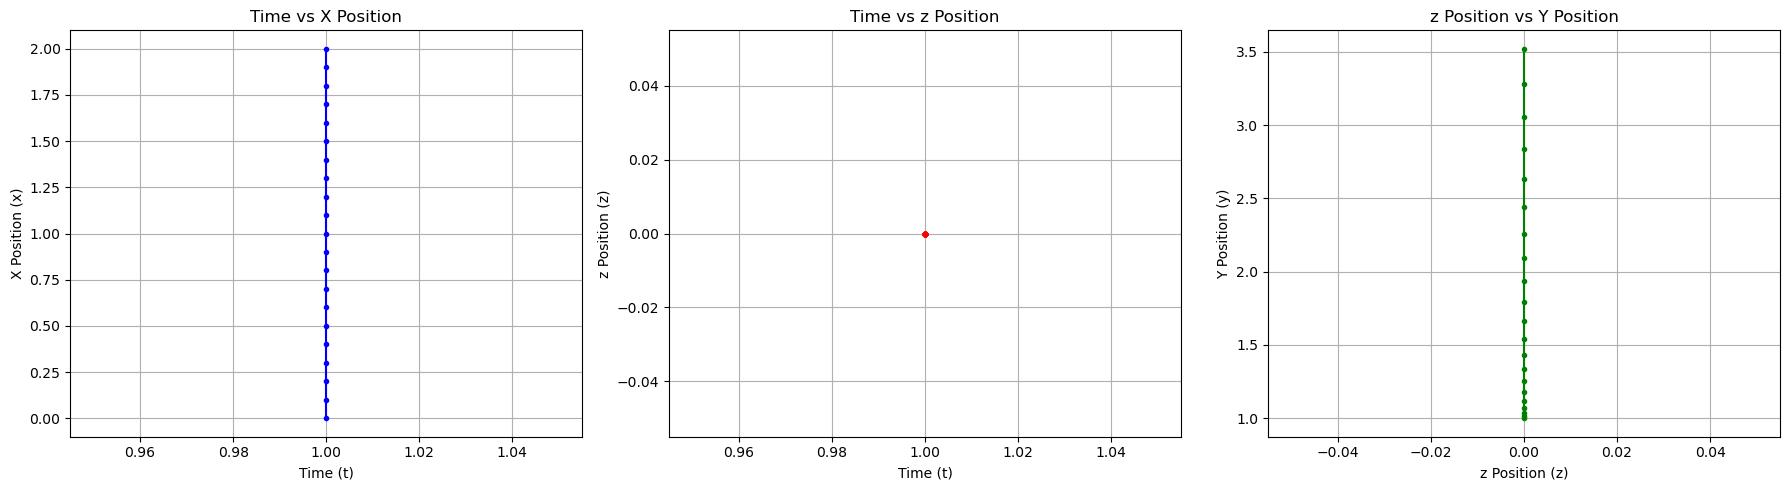

In [172]:
# Creating 2D plots for t-x, t-y, and x-y
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# t-x plot
ax1.plot(ts, xs, 'b.-')  # 'b.-' is the style: blue line with dots
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('X Position (x)')
ax1.set_title('Time vs X Position')
ax1.grid(True)

# t-y plot
ax2.plot(ts, zs, 'r.-')  # 'r.-' is the style: red line with dots
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('z Position (z)')
ax2.set_title('Time vs z Position')
ax2.grid(True)

# x-y plot
ax3.plot(zs, ys, 'g.-')  # 'g.-' is the style: green line with dots
ax3.set_xlabel('z Position (z)')
ax3.set_ylabel('Y Position (y)')
ax3.set_title('z Position vs Y Position')
ax3.grid(True)

# Display the plots next to each other
plt.tight_layout()
plt.show()

In [169]:
{k: v[1] for k, v in geods[0].items()}

{0: [0, 1, 0, 0],
 0.1: [0, 1, 0.120000000000000, 0],
 0.2: [0, 1, 0.240000000000000, 0],
 0.30000000000000004: [0, 1, 0.360000000000000, 0],
 0.4: [0, 1, 0.480000000000000, 0],
 0.5: [0, 1, 0.600000000000000, 0],
 0.6: [0, 1, 0.720000000000000, 0],
 0.7: [0, 1, 0.840000000000000, 0],
 0.7999999999999999: [0, 1, 0.960000000000000, 0],
 0.8999999999999999: [0, 1, 1.08000000000000, 0],
 0.9999999999999999: [0, 1, 1.20000000000000, 0],
 1.0999999999999999: [0, 1, 1.32000000000000, 0],
 1.2: [0, 1, 1.44000000000000, 0],
 1.3: [0, 1, 1.56000000000000, 0],
 1.4000000000000001: [0, 1, 1.68000000000000, 0],
 1.5000000000000002: [0, 1, 1.80000000000000, 0],
 1.6000000000000003: [0, 1, 1.92000000000000, 0],
 1.7000000000000004: [0, 1, 2.04000000000000, 0],
 1.8000000000000005: [0, 1, 2.16000000000000, 0],
 1.9000000000000006: [0, 1, 2.28000000000000, 0],
 2.0000000000000004: [0, 1, 2.40000000000000, 0]}